# Gym-trading-env test

# Resumen, ideas principales

Paper: Reinforcement learning applied to trading systems - a survey

* Pequeña mencion a la teoría eficiente del mercado vs economía conductual. (Los mercados son eficientes procesando la información y por lo tanto no son predecibles vs los humanos estamos mal hechos y tenemos sesgos que nos hacen interpretar mal la realidad, por lo tanto si lo son). Ambas ideas son posibles pero en mercados distintos: los mercados maduros pueden ser eficientes, pero los inmaduros no. (SP500 vs BTC?¿)
* Varios estudios tratan de predecir las tendencias de mercado mediante aprendizaje supervisado, pero esto no es suficiente para asegurar la maximización de los retornos a largo plazo. El RL proporciona un marco para desarrollar agentes inteligentes que aprenden estrategias capaces de maximizar los retornos a largo plazo.

`some RL methods support online learning and decision making`-> No entiendo que a que se refiere con eso.

### Tipos de problemas
1. **Single asset**: negociación de un solo activo -> conjunto de acciones discretas $A = \{-1, 0, 1\}$ o continuas $A = [-1, 1].
2. Portfolio alocation: optimizar la asignación de multiples activos. El agente toma acciones para cambiar la asignacion de una cartera de activos $w = (w_1, w_2, ..., w_n)$

### Análisis fundamental vs técnico
1. Fundamental: La información esta en el balance -> indicadores fundamentales
2. Técnico: la información está en el precio -> indicadores técnicos. 
3. Híbrido: ambos. 

### Conceptos de aprendizaje por refuerzo


### Aprendizaje por refuerzo aplicado al problema del trading

*dependiendo de qué características usen los enfoques de RL en el uso del dominio financiero para representar su estado, pueden clasificarse como un bandit contextual o una formulación completa de aprendizaje por refuerzo*. ?¿?¿?

Observabilidad: *Además, la formulación de MDP es una representación convencional que, para tareas de comercio, puede favorecer la representación de estados como una composición de series temporales de precios o retornos. Esta representación podría tener muchas implicaciones en la validez de la propiedad de Markov, ya que las series temporales de precios son insuficientes para explicar todos los estados futuros, lo que caracteriza un escenario de observabilidad parcial. Como aproximación usual, los autores asumen que las series temporales de precios en sí mismas son suficientes para superar el problema de observabilidad parcial. Alternativamente, los investigadores pueden asumir otras aproximaciones para satisfacer la propiedad de Markov y encajar una tarea como un problema de RL. Todas estas diferentes suposiciones pueden afectar la elección del método de RL adecuado.*


### Métodos de diferencia temporal
Avanzan hacia la política óptima global actualizando las estimaciones de la función de valor con la diferencia en los valores de estado consecutivos.

### Métodos de aproximación de políticas


# Métodos actor-critic

# Implementación

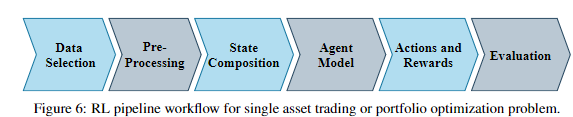

1. **Data selection**
    - Datos de minutos de distintos activos
2. **Pre-proceesamiento i.e. alpha factors**
    - Implementación de las metodologías del libro de prado ¿?¿?¿
        - tick imbalance bars
        - triple-barrier-method
        - ...
    - Obtención de indicadores en general (indicadores de momento, tendencia, volumen, volatilizad... + normalización)
    - ¿Optimización de los parámetros de los indicadores?
3. **Composición de los estados**
    - Aqui el paper hace una distincion que no entiendo del todo. Los problemas del tipo contextual bandit tienen estados que no son los indicadores previamente obtenidos. tienen cosas como el precio del activo, o embeddings... Mientras que los problemas del tipo "full RL" tienen como estados los indicadores técnicos.
    - También se define la ventana de tiempo.
4. **Agente/ Modelo**
    - Selección del modelo. -> Stable baselines3. Pearl (Meta)?
    recursos:
    - [PP0 implementation details](https://iclr-blog-track.github.io/2022/03/25/ppo-implementation-details/)
5. **Acciones y recompensas**
    - Acciones continuas o discretas. (posible meta-labelling)
    - Definición de las funciones de recompensa: Sharpe o sharpe ratio diferencial. PnL? Tammbién hay otros tipos de funciones de recompensa.
    - Definición del entorno y entrenamiento: Hay varias librerías que parecen sencillas. Gym-anytrading y gym-trading-env. Pero la primera solo tiene un espacio de acciones de buy/sell; y la segunda
6. **Evaluation - Backtest**
    - El backtest creo que requiere un capitulo aparte (uso de out-of-sample data? datos sintéticos? monte carlo)
    - Risk optimization? volatility targeting? size betting? kelly criterion? meta-labelling?

    recursos:

    - [Performance optimization and risk management for trading](https://www.udemy.com/course/performance-optimization-and-risk-management-for-trading/?couponCode=ST19MT61724)
    
    - [Mastering backtest for algorithmic trading](https://www.udemy.com/course/mastering-backtesting-for-algorithmic-trading/?couponCode=ST19MT61724)

In [2]:
import pandas as pd
import gymnasium as gym
import gym_trading_env

import numpy as np

In [2]:
#import gym_anytrading 

In [3]:
loaded_df = pd.read_parquet(r'C:\Users\adelapuente\Desktop\rf_tfm\data\PROCESSED_BTC_1min_2018-01-01_to_2021-11-25.parquet')

loaded_df

,open,low,high,close,volume,returns,ret_2,ret_5,rsi,atr,feature_open,feature_high,feature_low,feature_volume
date,,,,,,,,,,,,,,
2018-01-01 02:47:00,-0.224509,-0.227294,-0.209602,-0.226540,0.212065,-0.192554,-0.128397,-3.736451,-1.450881,3.246429,0.300769,1.795748,-0.045642,2.368892
2018-01-01 02:48:00,-0.226658,-0.227576,-0.208910,-0.228401,-0.022321,-0.331129,-0.511607,-0.615667,-1.477736,3.303711,0.253461,2.107033,0.289793,1.300949
2018-01-01 02:49:00,-0.227123,-0.227029,-0.208649,-0.227296,-0.338822,0.191320,-0.134649,-0.573698,-1.461443,3.352438,-0.008338,2.002317,0.171057,-0.141136
2018-01-01 02:50:00,-0.224586,-0.227901,-0.209154,-0.229560,-0.248335,-0.402560,-0.205056,-0.627058,-1.462164,3.403413,0.793192,2.220734,0.467652,0.271152
2018-01-01 02:51:00,-0.225787,-0.227901,-0.209358,-0.223152,-0.330127,1.128240,0.714511,0.380858,-1.134148,3.447564,-0.473357,1.411526,-0.889478,-0.101522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25 23:55:00,2.342528,2.346252,2.342629,2.344494,0.455251,0.080019,0.042072,0.067509,1.248619,-0.235311,-0.126046,-0.545819,0.366637,0.385078
2021-11-25 23:56:00,2.343995,2.346312,2.342017,2.343556,-0.243271,-0.042579,0.040245,0.029137,1.223213,-0.256624,-0.031861,-0.536620,0.416633,-0.477142
2021-11-25 23:57:00,2.342871,2.344788,2.341002,2.341085,-0.207991,-0.106081,-0.142882,-0.168122,1.051551,-0.268453,0.020918,-0.495586,0.464077,-0.433595


In [10]:
# loaded_df.rename(columns={
#     'close': 'Close',
#     'high': 'High',
#     'low': 'Low',
#     'volume': 'Volume'  # Solo si tienes estas columnas y quieres renombrarlas
# }, inplace=True)

In [8]:
# def reward_function(history):
#         return np.log(history["portfolio_valuation", -1] / history["portfolio_valuation", -2])


In [11]:
env = gym.make('stocks-v0', df=loaded_df, frame_bound=(5, 100), window_size=5)

In [6]:
idx = 3
windows = 5
np.arange(idx + 1 - windows, idx + 1)

array([-1,  0,  1,  2,  3])

In [13]:
env.prices

c:\Users\adelapuente\AppData\Local\miniconda3\envs\data_process\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.prices to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.prices` for environment variables or `env.get_wrapper_attr('prices')` that will search the reminding wrappers.
  logger.warn(


array([-0.22654039, -0.22840129, -0.22729567, -0.22956038, -0.22315206,
       -0.22549461, -0.2259013 , -0.22519651, -0.22479743, -0.22607619,
       -0.22452669, -0.20725738, -0.22700518, -0.20730385, -0.22946218,
       -0.21090598, -0.23117203, -0.2311726 , -0.22816716, -0.20797199,
       -0.2275577 , -0.22776046, -0.22729567, -0.22703306, -0.22630799,
       -0.22665717, -0.22439073, -0.22433205, -0.22508791, -0.22524653,
       -0.22511639, -0.19801384, -0.22491421, -0.2211953 , -0.22154273,
       -0.22410023, -0.22322643, -0.223148  , -0.22185355, -0.22452843,
       -0.22560383, -0.2244163 , -0.22532031, -0.22508791, -0.22775175,
       -0.23269887, -0.23426753, -0.23420943, -0.23420943, -0.23659149,
       -0.21497871, -0.23420885, -0.23246647, -0.21521111, -0.21677978,
       -0.23614587, -0.23688199, -0.23757917, -0.23711497, -0.23949644,
       -0.21927804, -0.23537199, -0.23810206, -0.23420943, -0.23827636,
       -0.23671699, -0.23903164, -0.23713645, -0.23865865, -0.23

### Gym-trading-env

In [4]:
env = gym.make(
        "TradingEnv",
        name= "BTCUSD",
        df = loaded_df,
        windows= 5,
        positions = [-1, 0, 1],  # -1 (=SHORT), +1 (=LONG)
        initial_position = 'random', #Initial position
        trading_fees = 0.01/100, # 0.01% per stock buy / sell
        borrow_interest_rate = None,
        #borrow_interest_rate= 0.0003/100, #per timestep (= 1h here)
        #reward_function = reward_function,
        portfolio_initial_value = 10000, # in FIAT (here, USD)
        max_episode_duration = 500000,
    )

env.unwrapped.add_metric('Episode Lenght', lambda history : len(history['position']) )
# env.add_metric('Position Changes', lambda history : np.sum(np.diff(history['position']) != 0) )

In [5]:
# Run an episode until it ends :
done, truncated = False, False
observation, info = env.reset()
while not done and not truncated:
    # Pick a position by its index in your position list (=[-1, 0, 1])....usually something like : position_index = your_policy(observation)
    position_index = env.action_space.sample() # At every timestep, pick a random position index from your position list (=[-1, 0, 1])
    observation, reward, done, truncated, info = env.step(position_index)

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [6]:
from stable_baselines3 import A2C

# Define el modelo
model = A2C("MlpPolicy", env, 
            #learning_rate = learning_rate, 
            #gamma = gamma,
            # n_steps = n_steps,
            # batch_size = batch_size,
            # ent_coef = ent_coef,
            # clip_range = clip_range,
            #n_epochs = n_epochs,
            device='cuda',
            verbose=1, 
            tensorboard_log = './tb_logs')

# Callback para evaluación y Early Stopping
# eval_env = create_envs(n_envs= 1)
# eval_callback = EvalCallback(eval_env, 
#                             log_path=log_path, eval_freq=500,
#                             deterministic=True, render=False,
#                             n_eval_episodes=5)


# Entrena el modelo
model.learn(total_timesteps= 10_000_000, 
            #callback=[eval_callback, EarlyStoppingCallback(check_freq = 350, patience = 10)]
            ) 


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./tb_logs\A2C_1
-------------------------------------
| time/                 |           |
|    fps                | 402       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.976    |
|    explained_variance | -3.42e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.173     |
|    value_loss         | 0.0205    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 461       |
|    iterations         | 200       |
|    time_elapsed       | 2         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -1.03     |
|    explained_variance | -1.36e+04 |
|    

RuntimeWarning: overflow encountered in scalar subtract